1) Prepare a classification model using Naive Bayes 
for salary data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
sd_train = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/SalaryData_train.csv')
sd_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sd_test = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/SalaryData_test.csv')
sd_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [5]:
sd_train.shape

(30161, 14)

In [6]:
sd_test.shape

(15060, 14)

In [7]:
sd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
sd_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
sd_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
print('FINDING IF THER IS ANY SPECIAL CHARACTERS IN TRAIN DATA\n',sd_train.isin(['?']).sum(axis=0))
print('\n\nFINDING IF THER IS ANY SPECIAL CHARACTERS IN TEST DATA\n',sd_test.isin(['?']).sum(axis=0))

FINDING IF THER IS ANY SPECIAL CHARACTERS IN TRAIN DATA
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


FINDING IF THER IS ANY SPECIAL CHARACTERS IN TEST DATA
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [12]:
sd_train[0:5]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#finding categorical variable
categorical = [var for var in sd_train.columns if sd_train[var].dtypes=='O']
print('•THERE ARE {} CATEGORICAL VARIABLES.\n'.format(len(categorical)))
print('•CATEGORICAL VARIABLES ARE:\n',categorical)

•THERE ARE 9 CATEGORICAL VARIABLES.

•CATEGORICAL VARIABLES ARE:
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [14]:
sd_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [15]:
#checking missing valeues in the categorical variables
sd_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [16]:
#viewing frequency count of values in categorical values
for var in categorical:
    print(sd_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [17]:
#viewing frequency distribution of categorical values
for var in categorical:
    print(sd_train[var].value_counts()/np.float(len(sd_train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [18]:
#checking labels work class variable
sd_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [19]:
#checking frequency varible in workclass varibles
sd_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [20]:
#checking labels in occupation varibale
sd_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
#checking frequency distribution in occupation variables
sd_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
#checking labels in native_country variable
sd_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [23]:
#checking frequency distribution i native_country variable
sd_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [24]:
#checking for cardinality in categorical variables
for var in categorical:
    print(var,'contains',len(sd_train[var].unique()),'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


EXPLORING NUMERICAL VARIABLE

In [25]:
# finding numerical variable
num = [var for var in sd_train.columns if sd_train[var].dtype!='O']
print('THERE ARE {} NUMERICAL VARIABLES\n'.format(len(num)))
print('NUMERICAL VARIABLES ARE:\n',num)

THERE ARE 5 NUMERICAL VARIABLES

NUMERICAL VARIABLES ARE:
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [26]:
#viewing the numerical variable
sd_train[num].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [27]:
#checking if there is any problem in  or missing values in nimerial variables
sd_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [28]:
#declaring feature vector and target variable
x = sd_train.drop(['Salary'],axis = 1)
y = sd_train['Salary']

In [29]:
#split x and y into training training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [30]:
#checking the shape of xtrain and xtest
x_train.shape , x_test.shape

((21112, 13), (9049, 13))

FEATURE ENGINEERING

In [32]:
x_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [33]:
x_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [35]:
#displaying categorical variables
categorical2 = [col for col in x_train.columns if x_train[col].dtypes=='O']
categorical2

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [37]:
#displaying numerical variables
num2 = [col for col in x_train.columns if x_train[col].dtypes!='O']
num2

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [38]:
#percentage of missing values in categorical variables in training set
x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [40]:
#printing  categorical variable with missing data
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col,(x_train.isnull().mean()))

In [42]:
#importing the missing categorical values with most frequent value
for df2 in [x_train,x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0],inplace=True)
    df2['native'].fillna(x_train['native'].mode()[0],inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0],inplace=True)

In [43]:
#checking missing values in categorical variables in x_train
x_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [44]:
#checking missing values in categorical variables in x_test
x_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [45]:
#checking missing values in x train
x_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [46]:
#checking missing values in x test
x_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [47]:
#ENCODING CATEGORICAL VARIABLES
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [48]:
x_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [55]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 584.2 kB/s eta 0:00:00a 0:00:01


In [60]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [61]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
x_train.shape

(21112, 102)

In [63]:
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18840,21,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8391,56,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
x_test.shape

(9049, 102)

FEATURE SCALING

In [66]:
cols = x_train.columns

In [67]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [68]:
x_train = pd.DataFrame(x_train,columns=[cols])
x_test = pd.DataFrame(x_test,columns=[cols])

In [69]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


MODEL TRAINING

In [70]:
#train a gaussian naive bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [72]:
#predicting the accuracy
y_pred = gnb.predict(x_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [74]:
#checking accuracy score
from sklearn.metrics import accuracy_score
print('MODEL ACCURACY SCORE:',format(accuracy_score(y_test,y_pred)))

MODEL ACCURACY SCORE: 0.7916896894684495


In [76]:
#comparing the train set and test set accuracy
y_pred_train = gnb.predict(x_train)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [77]:
print('TRAINING SET ACCCURACY SCORE:',format(accuracy_score(y_train,y_pred_train)))

TRAINING SET ACCCURACY SCORE: 0.8022925350511557


In [78]:
#checking for overfitting and underfitting
print('TRAINING SET SCORE:',format(gnb.score(x_train,y_train)))
print('TEST SET SCORE:',format(gnb.score(x_test,y_test)))

TRAINING SET SCORE: 0.8022925350511557
TEST SET SCORE: 0.7916896894684495


In [79]:
#checking class distribution in test set
y_test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [80]:
#checking null accuracy score
null_acc = (7407)/(7407+2362)
print('NULL ACCURACY SCORE IS:',format(null_acc))

NULL ACCURACY SCORE IS: 0.7582147609786057


HERE WE CAN SEE THAT OUR MODEL ACCURACY SCORE IS 0.8023, BUT THE NULL ACCURACY SCORE IS 0.7582. 
SO THE NAIVE BAYES CLASSIFICATION IS INDEED DOING PERFECTLY  IN PREDICTING THE CLASS LABELS.

CONFUSION MATRIX

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('CONFUSION MATRIX:\n\n',cm)
print('\nTRUE POSITIVE(TP) =',cm[0,0])
print('\nTRUE NEGATIVE(TN) =',cm[1,1])
print('\nFALSE POSITIVE(FP) =',cm[0,1])
print('\nFALSE POSITIVE(FN) =',cm[1,0])

CONFUSION MATRIX:

 [[6517  281]
 [1604  647]]

TRUE POSITIVE(TP) = 6517

TRUE NEGATIVE(TN) = 647

FALSE POSITIVE(FP) = 281

FALSE POSITIVE(FN) = 1604


<AxesSubplot:>

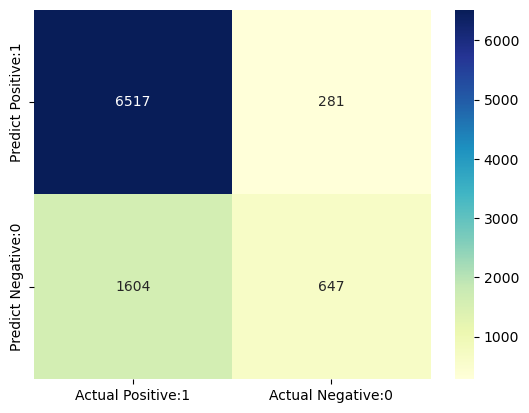

In [86]:
#VISUALIZING THE CONFUSION MATRIX
cm_matrix = pd.DataFrame(data=cm,columns = ['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      6798
        >50K       0.70      0.29      0.41      2251

    accuracy                           0.79      9049
   macro avg       0.75      0.62      0.64      9049
weighted avg       0.78      0.79      0.76      9049



In [89]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [93]:
#classification accuracy
classification_acc = (TP+TN)/float(TN+TP+FP+FN)
print('CLASSIFICATION ACCURACY:{0:0.5f}'.format(classification_acc))

CLASSIFICATION ACCURACY:0.79169


In [95]:
#PRECISION SCORE
precision = TP/float(TP+FP)
print('PRECISION SCORE: {0:0.5f}'.format(precision))

PRECISION SCORE: 0.95866


In [97]:
#RECALL
recall = TP/float(TP+FN)
print('RECALL OR SENSITIVITY: {0:0.5f}'.format(recall))

RECALL OR SENSITIVITY: 0.80249


In [98]:
#TRUE POSITIVE RATE
#True positive rate is synonymous with recall
tpr = TP/float(TP+FN)
print('TRUE POSITIVE RATE: {0:0.5f}'.format(tpr))

TRUE POSITIVE RATE: 0.80249


In [99]:
#FALSE POSITIVE RATE
fpr = FP/float(FP+TN)
print('FALSE POSITIVE RATE: {0:0.5f}'.format(fpr))

FALSE POSITIVE RATE: 0.30280


In [101]:
#SPECIFICITY
specificity = TN / (TN+FP)
print('SPECIFICITY: {0:0.5f}'.format(specificity))

SPECIFICITY: 0.69720


In [102]:
#CALCULATE CLASS PROBABILITIES
#print first 10 probabilities of two classes 0 and 1
y_pred_prob = gnb.predict_proba(x_test[0:10])
y_pred_prob

array([[5.96438930e-01, 4.03561070e-01],
       [9.99999998e-01, 2.13131550e-09],
       [9.98640434e-01, 1.35956588e-03],
       [9.99906179e-01, 9.38209711e-05],
       [9.99979990e-01, 2.00099073e-05],
       [9.99242424e-01, 7.57576156e-04],
       [9.14662427e-08, 9.99999909e-01],
       [1.35825947e-01, 8.64174053e-01],
       [9.98703848e-01, 1.29615189e-03],
       [9.99216796e-01, 7.83203788e-04]])

In [105]:
#STORE THE PROBABILITIES IN DATAFRAME
y_pred_prob_df = pd.DataFrame(data = y_pred_prob,columns = ['PROB OF - <=50K','PROB OF - >50K'])
y_pred_prob_df

,PROB OF - <=50K,PROB OF - >50K
0,5.964389e-01,4.035611e-01
1,1.000000e+00,2.131316e-09
2,9.986404e-01,1.359566e-03
3,9.999062e-01,9.382097e-05
4,9.999800e-01,2.000991e-05
5,9.992424e-01,7.575762e-04
6,9.146624e-08,9.999999e-01
7,1.358259e-01,8.641741e-01
8,9.987038e-01,1.296152e-03
9,9.992168e-01,7.832038e-04


In [106]:
#PRINT THE FIRST 10 PREDICTED PROBABILITIES FOR CLASS 1 - PROBABILITY OF >50K
gnb.predict_proba(x_test)[0:10,1]

array([4.03561070e-01, 2.13131550e-09, 1.35956588e-03, 9.38209711e-05,
       2.00099073e-05, 7.57576156e-04, 9.99999909e-01, 8.64174053e-01,
       1.29615189e-03, 7.83203788e-04])

In [107]:
#STOREING THE PREDICTED PROBABILITIES FOR CLASS 1 - PROBABILITY OF >50K
y_pred1 = gnb.predict_proba(x_test)[:,1]


Text(0, 0.5, 'FREQUENCY')

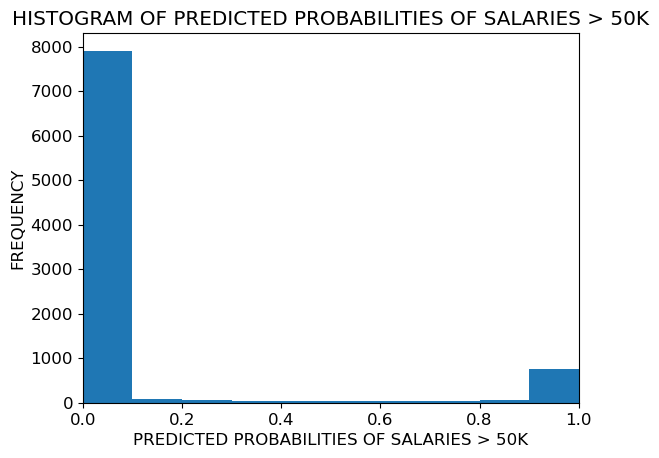

In [108]:
#PLOTTING HISTOGRAM
plt.rcParams['font.size']=12
plt.hist(y_pred1,bins=10)
plt.title('HISTOGRAM OF PREDICTED PROBABILITIES OF SALARIES > 50K')
plt.xlim(0,1)
plt.xlabel('PREDICTED PROBABILITIES OF SALARIES > 50K')
plt.ylabel('FREQUENCY')

ROC - AUC

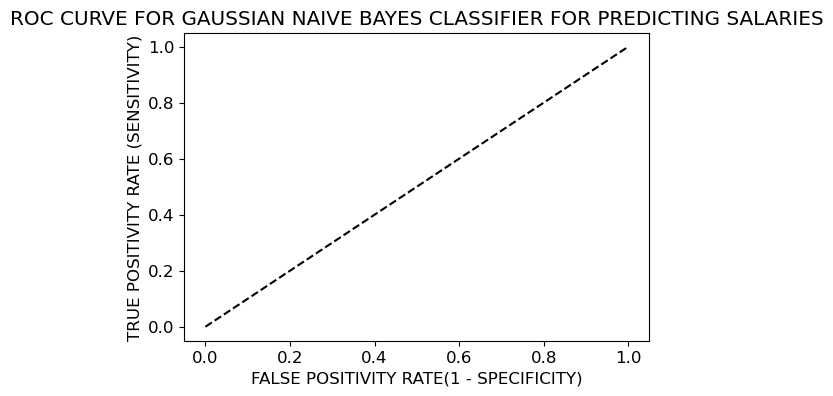

In [109]:
#plot roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred1,pos_label='>50K')
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
plt.title('ROC CURVE FOR GAUSSIAN NAIVE BAYES CLASSIFIER FOR PREDICTING SALARIES')
plt.xlabel('FALSE POSITIVITY RATE(1 - SPECIFICITY)')
plt.ylabel('TRUE POSITIVITY RATE (SENSITIVITY)')
plt.show()

In [110]:
#COMPUTE ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred1)
print('ROC AUC: {0:0.4f}'.format(roc_auc))

ROC AUC: 0.6380


In [112]:
#INTERPRETATION
#calculating cross-validated roc auc
from sklearn.model_selection import cross_val_score
cross_val_roc_auc = cross_val_score(gnb , x_train , y_train,cv=5,scoring='roc_auc').mean()
print('CROSS VALIDATED ROC AUC: {0:0.4f}'.format(cross_val_roc_auc))

CROSS VALIDATED ROC AUC: 0.8923


In [118]:
#KFOLD CROSS VALIDATION
scores = cross_val_score(gnb , x_train , y_train,cv=10,scoring='accuracy')
print('CROSS VALIDATION SCORES:\n ',format(scores))

CROSS VALIDATION SCORES:
  [0.81676136 0.79829545 0.79014685 0.81288489 0.80388441 0.79062056
 0.80767409 0.7925154  0.79630507 0.80909522]


In [120]:
#computing average cross validation score
print('AVERAGE CROSS VALIDATION SCORE: {0:0.4f}'.format(scores.mean()))

AVERAGE CROSS VALIDATION SCORE: 0.8018
